findfont: Font family 'times' not found.
findfont: Font family 'times' not found.


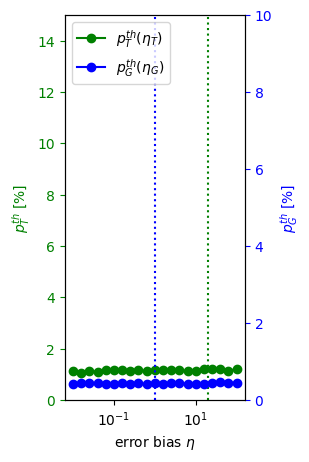

In [20]:
import numpy as np
import json
import matplotlib.pyplot as plt

# code, dmax, logicals = ['XYZ2', '9', ['X','Z']]
code, dmax, logicals = ['HFC', '9', ['X','Z']]
home_dir = './Data/bias/'


LogX_fail_Tbias_threshold = json.load(open(home_dir+code+'_threshold_Tbias_logical'+logicals[0]+'_dmax'+dmax+'_maxshots0k_Gbias1.json'))
LogZ_fail_Tbias_threshold = json.load(open(home_dir+code+'_threshold_Tbias_logical'+logicals[1]+'_dmax'+dmax+'_maxshots0k_Gbias1.json'))

LogX_fail_Gbias_threshold = json.load(open(home_dir+code+'_threshold_Gbias_logical'+logicals[0]+'_dmax'+dmax+'_maxshots0k_Tbias20.json'))
LogZ_fail_Gbias_threshold = json.load(open(home_dir+code+'_threshold_Gbias_logical'+logicals[1]+'_dmax'+dmax+'_maxshots0k_Tbias20.json'))

Tbias,pT_threshold1,pT_error = np.transpose(LogX_fail_Tbias_threshold)
Tbias,pT_threshold2,pT_error = np.transpose(LogZ_fail_Tbias_threshold)
for pind in range(len(pT_threshold1)):
    if pT_threshold1[pind]==0:
        pT_threshold1[pind] = pT_threshold2[pind]
    if pT_threshold2[pind]==0:
        pT_threshold2[pind] = pT_threshold1[pind]
pT_threshold = np.array([min(pT_threshold1[pind],pT_threshold2[pind]) for pind in range(len(pT_threshold1))])

Gbias,pG_threshold1,pT_error = np.transpose(LogX_fail_Gbias_threshold)
Gbias,pG_threshold2,pT_error = np.transpose(LogZ_fail_Gbias_threshold)
for pind in range(len(pG_threshold1)):
    if pG_threshold1[pind]==0:
        pG_threshold1[pind] = pG_threshold2[pind]
    if pG_threshold2[pind]==0:
        pG_threshold2[pind] = pG_threshold1[pind]
pG_threshold = np.array([min(pG_threshold1[pind],pG_threshold2[pind]) for pind in range(len(pG_threshold1))])

pTmin,pTmax = 100*min(pT_threshold)[0],100*max(pT_threshold)[0]
pGmin,pGmax = 100*min(pG_threshold)[0],100*max(pG_threshold)[0]

fig, ax = plt.subplots(figsize = [3,5])
# fig, ax = plt.subplots(figsize = [7,5])
fig.subplots_adjust(left=0.2,right=0.8)
ax1 = ax.twinx()

p1, = ax.plot(Tbias,pT_threshold*100,'o-',c='g',label = '$p_T^{th}(\eta_T)$')
p2, = ax1.plot(Gbias,pG_threshold*100,'o-',c='b', label = '$p_G^{th}(\eta_G)$')
ax.semilogx()
ax.legend(handles=[p1,p2], loc = 'upper left')
ax.set_ylim(0,15) 
ax1.set_ylim(0,10)
ax.axvline(20, linestyle = 'dotted', c='green')
ax.axvline(1, linestyle = 'dotted', c='blue')

ax.tick_params(axis='y', colors=p1.get_color())
ax1.tick_params(axis='y', colors=p2.get_color())
ax.set_xlabel('error bias $\eta$', fontfamily = 'times')
ax.set_ylabel('$p_T^{th}$ [%]', c=p1.get_color())
ax1.set_ylabel('$p_G^{th}$ [%]', c=p2.get_color())
plt.show()